<a href="https://colab.research.google.com/github/bigjoo99/Study-machine-learning/blob/main/3_%EC%84%A0%ED%98%95_%EB%AA%A8%EB%8D%B8(Linear_Models).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치


## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

<ipython-input-1-74e69c5ee709>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

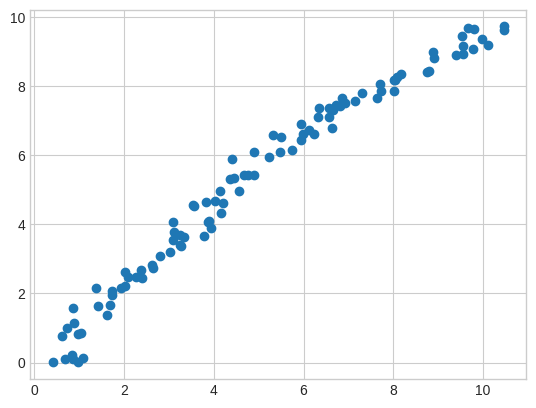

In [3]:
noise = np.random.rand(100,1)
X = sorted(10 * np.random.rand(100, 1)) + noise
y = sorted(10 * np.random.rand(100))

plt.scatter(X, y);

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
print("선형 회귀 가중치: {}".format(model.coef_))
print("선형 회귀 편향: {}".format(model.intercept_))        # W0를 의미 = bias

선형 회귀 가중치: [0.9643046]
선형 회귀 편향: 0.45979451414921435


In [6]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9627170605542033
평가 데이터 점수: 0.9766726260188806


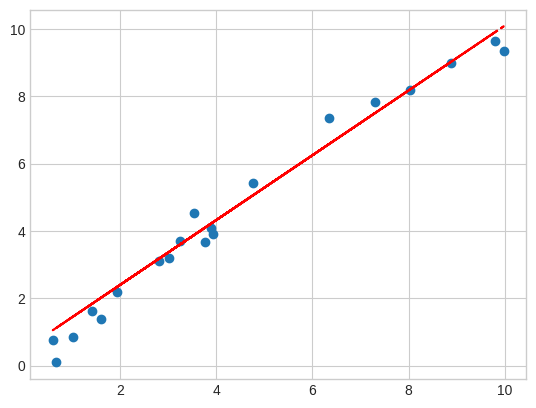

In [7]:
predict = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, predict, '--r');

### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [8]:
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([boston_df.values[::2, :], boston_df.values[1::2, :2]])
target = boston_df.values[1::2, 2]

In [9]:
boston_df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1012.000000,1012.000000,1012.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,180.143778,12.008350,16.834792,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,188.132839,17.250728,9.912616,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,0.257830,0.000000,8.375000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,24.021000,7.240000,18.100000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,391.435000,16.780000,21.890000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,396.900000,100.000000,50.000000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


### 보스턴 주택 가격에 대한 선형 회귀

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
model.fit(X_train, y_train)

LinearRegression()

In [12]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}" .format(model.score(X_test , y_test)))

학습 데이터 점수: 0.724781347458284
평가 데이터 점수: 0.775087907907186


* 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
* 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
* `cross_val_score()` 함수는 교차 검증을 수행하여 모델을 검증
* 다음 예제에서는 모델 오류를 측정하는 점수로 NMSE(Negative Mean Squared Error)를 사용

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, data, target, cv=10, scoring='neg_mean_squared_error')
print("NMSE scores: {}".format(scores))
print("NMSE scores mean: {}".format(scores.mean()))
print("NMSE scores std: {}".format(scores.std()))

NMSE scores: [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
NMSE scores mean: -34.70525594452492
NMSE scores std: 45.57399920030872


* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용

In [14]:
r2_scores = cross_val_score(model, data, target, cv=10, scoring='r2')
print("R2 scores: {}".format(r2_scores))
print("R2 scores mean: {}".format(r2_scores.mean()))
print("R2 scores std: {}".format(r2_scores.std()))

R2 scores: [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores mean: 0.20252899006055985
R2 scores std: 0.5952960169512244


생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
* intercept_: 추정된 상수항
* coef_: 추정된 가중치 벡터

In [15]:
print('y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
  print(str(c) + ' * x' + str(i))

y = 41.42046943808563 
-0.09568250328327407 * x0
0.04777127604202977 * x1
0.06434009922869958 * x2
1.3108498964961208 * x3
-19.779795796928195 * x4
3.3338012298132145 * x5
0.0076862336526573125 * x6
-1.4292488104488446 * x7
0.3228293476857052 * x8
-0.012857329491945547 * x9
-1.0599361796234656 * x10
0.009950734012040642 * x11
-0.5381488927972824 * x12


train데이터셋에 대한 모델 평가 결과

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE: 4.663203214838097
R2 Score: 0.724781347458284


test데이터셋에 대한 모델 평가 결과

In [17]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))


RMSE: 4.878787530332933
R2 Score: 0.775087907907186


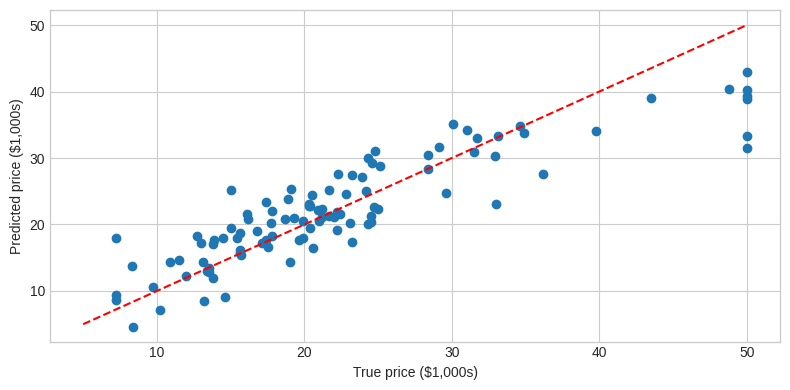

In [18]:
def plot_boston_prices(expected, predicted):
  plt.figure(figsize=(8, 4))
  plt.scatter(expected, predicted)
  plt.plot([5, 50], [5, 50], '--r')
  plt.xlabel('True price ($1,000s)')
  plt.ylabel('Predicted price ($1,000s)')
  plt.tight_layout()
predicted = model.predict(X_test)
expected = y_test
plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |

In [19]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

In [20]:
import pandas as pd
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Target'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


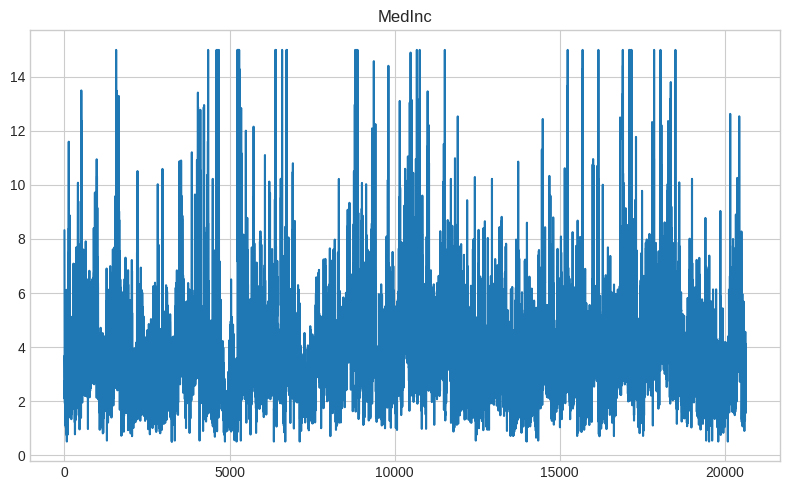

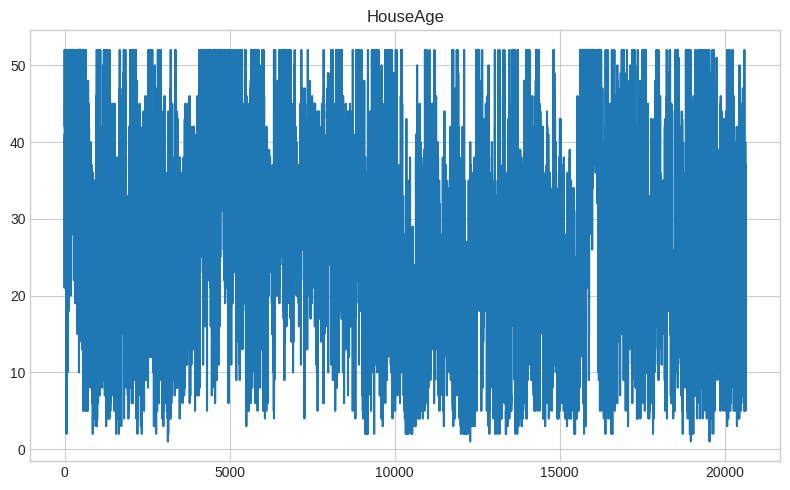

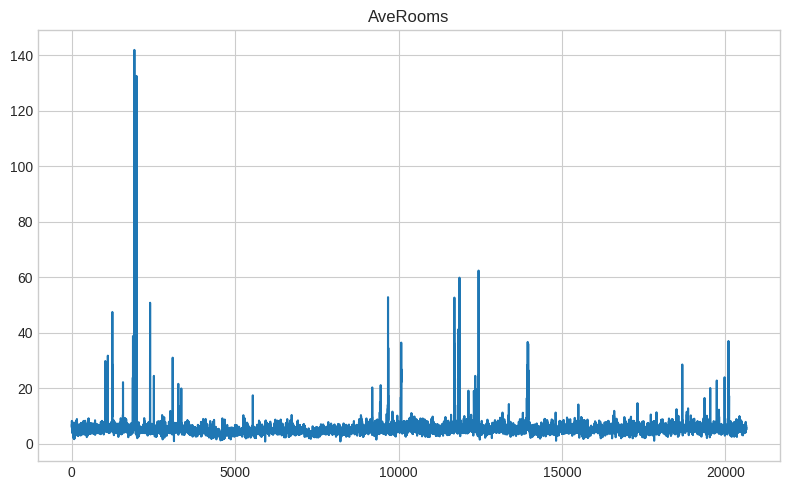

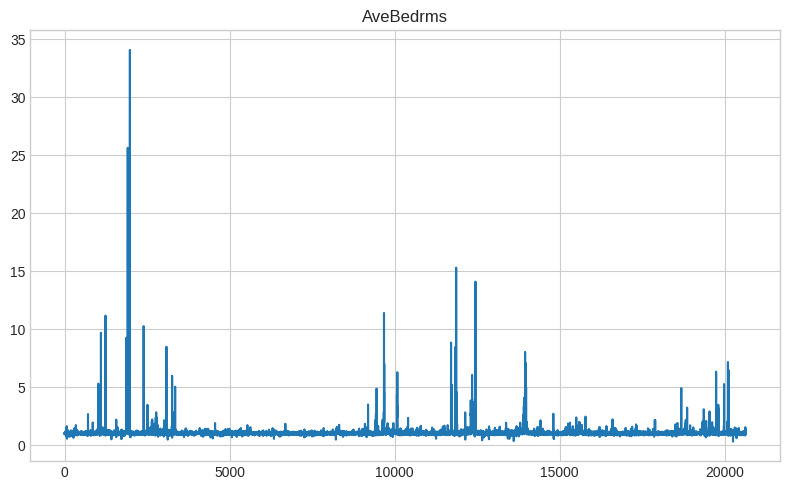

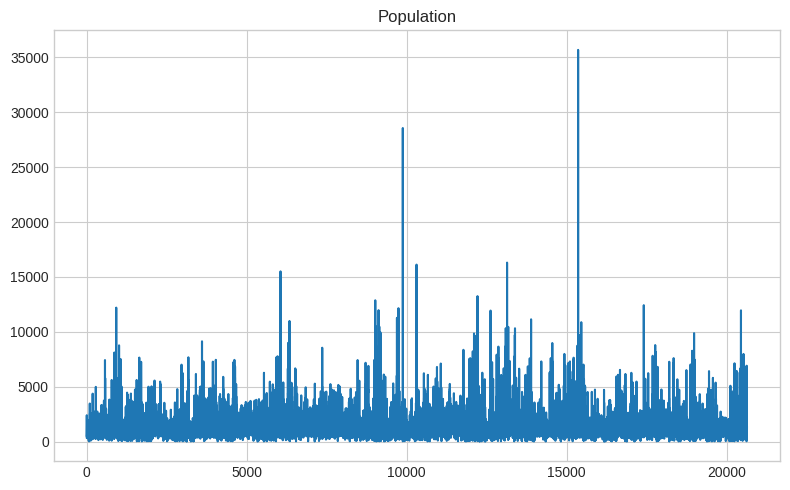

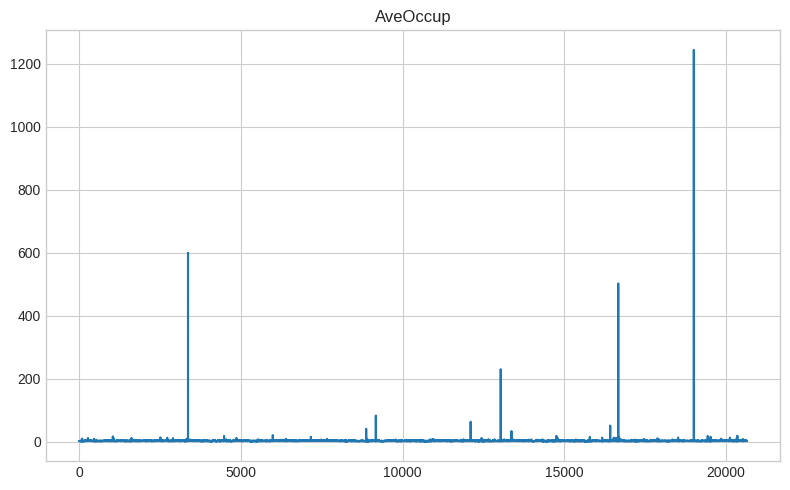

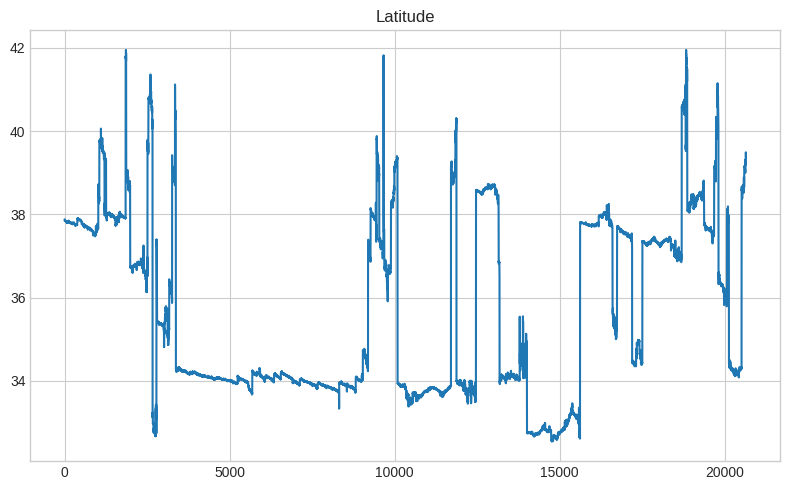

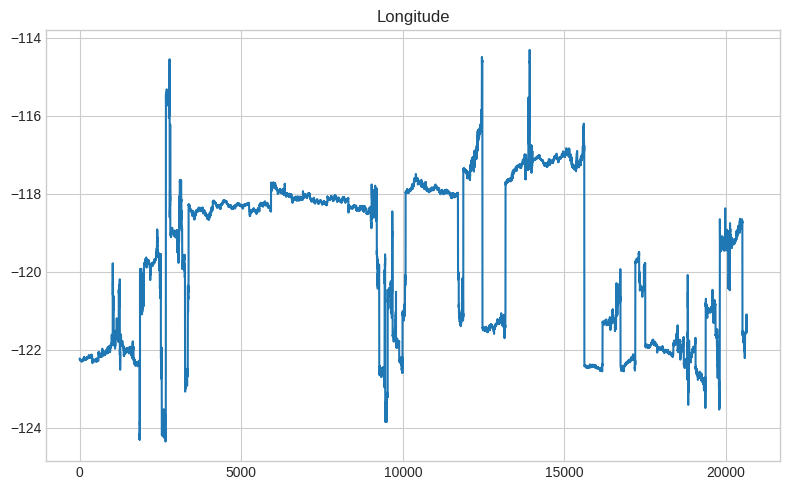

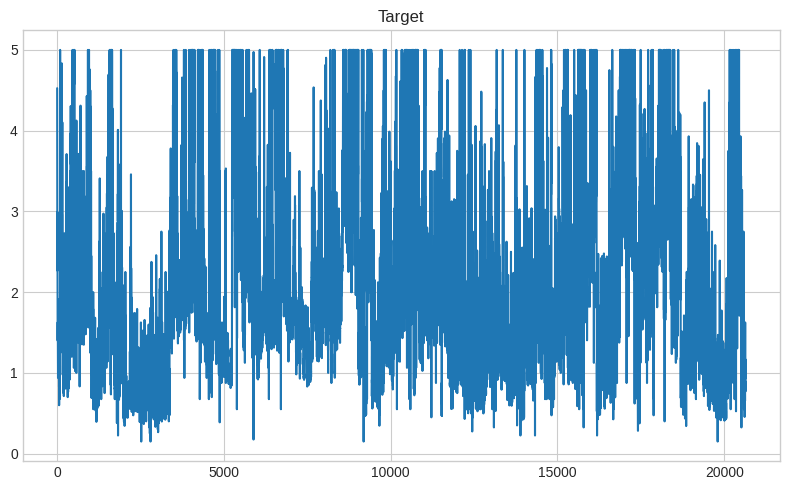

In [22]:
import matplotlib.pyplot as plt
for i, col in enumerate(california_df.columns):
  plt.figure(figsize=(8, 5))
  plt.plot(california_df[col])
  plt.title(col)
  plt.tight_layout()


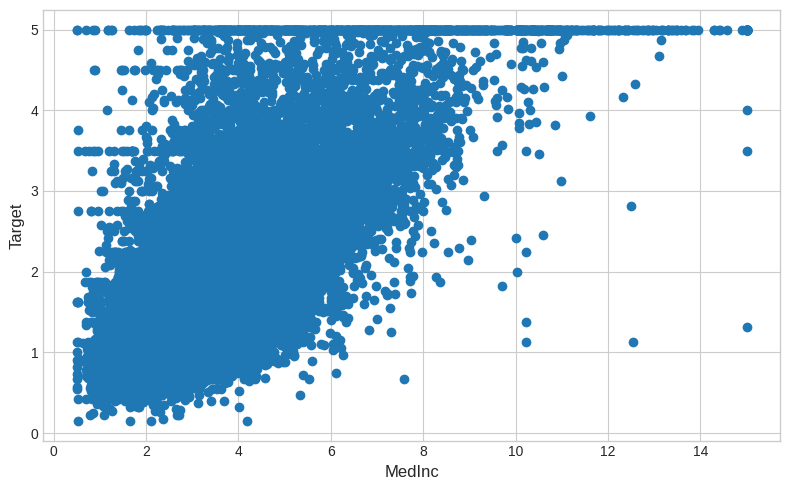

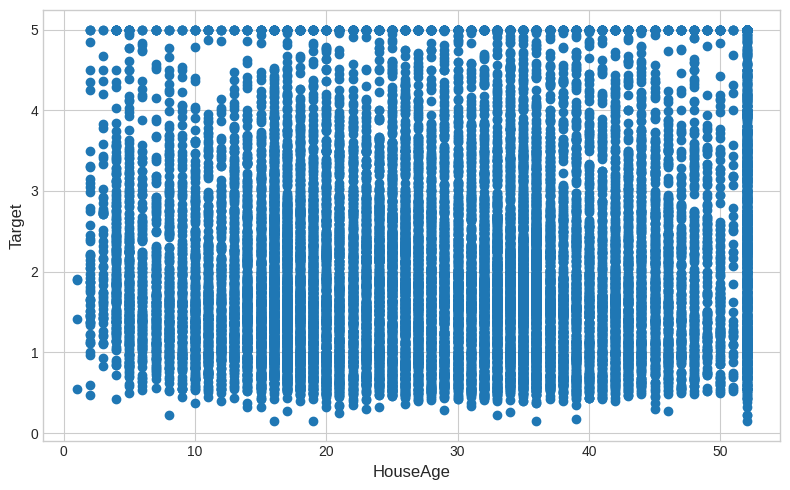

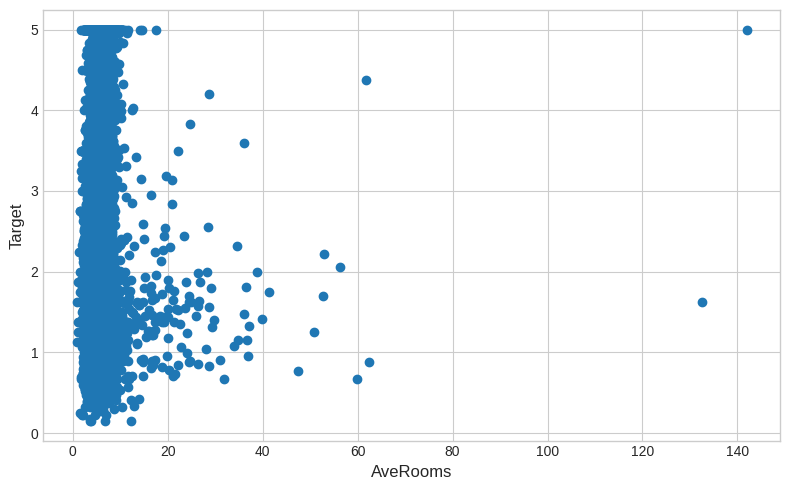

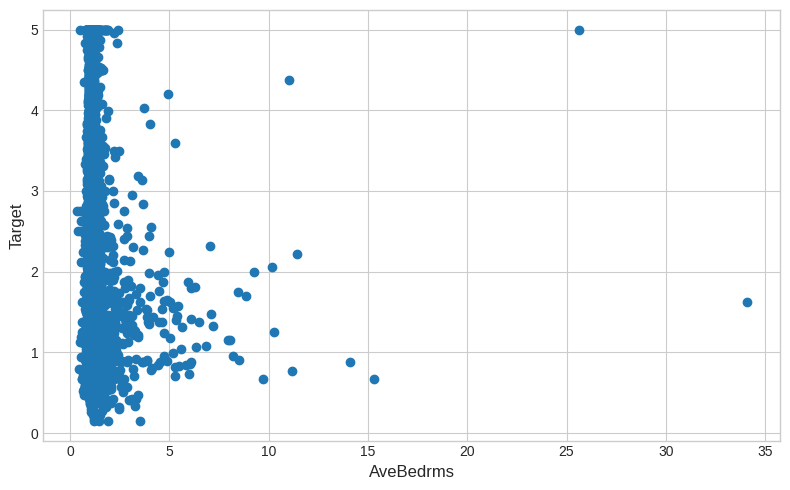

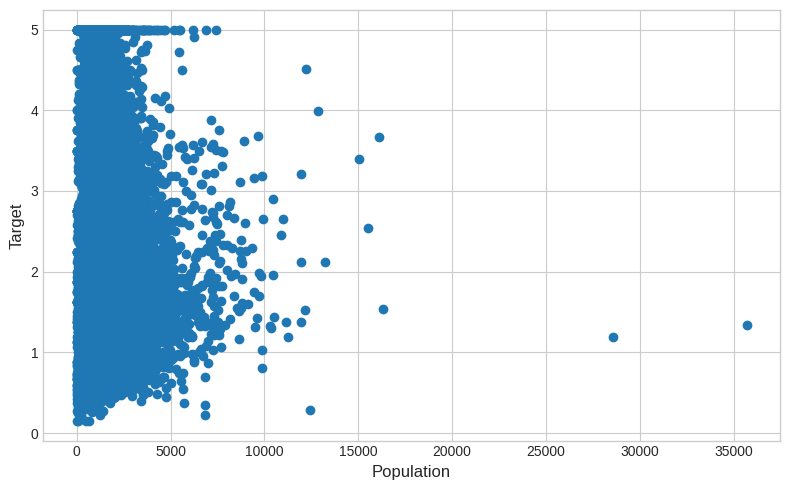

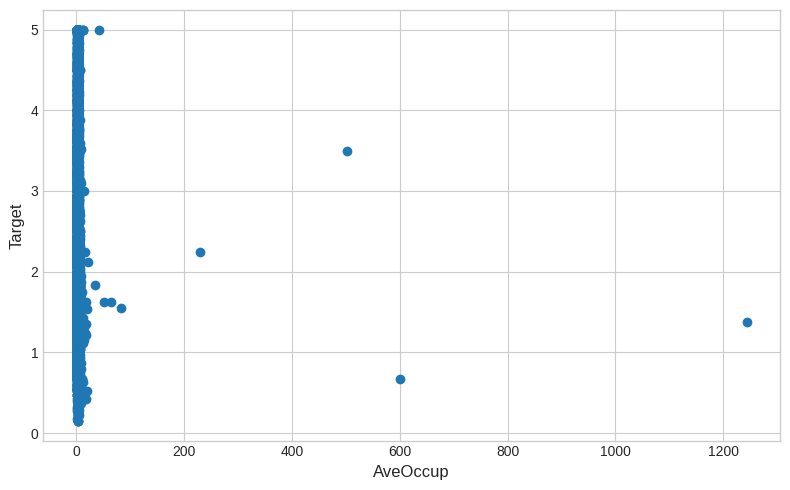

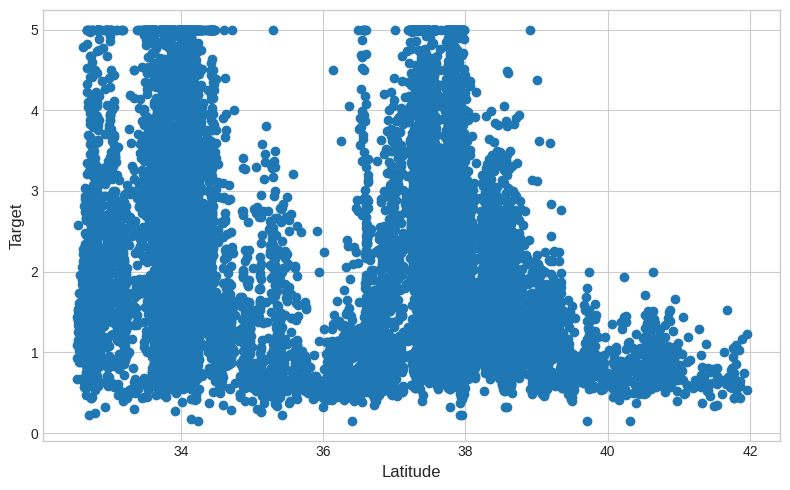

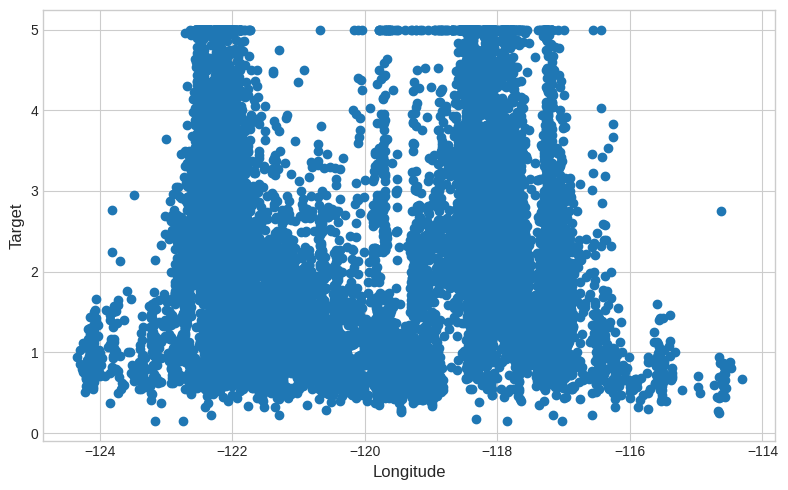

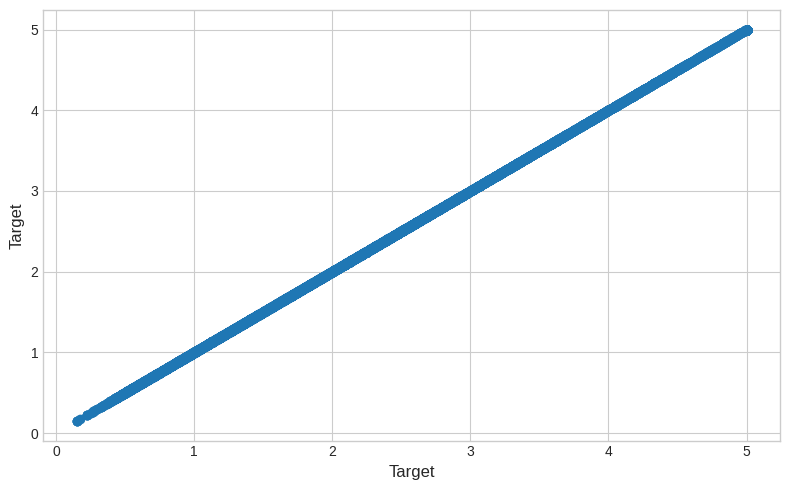

In [23]:
for i, col in enumerate(california_df.columns):
  plt.figure(figsize=(8, 5))
  plt.scatter(california_df[col], california_df['Target'])
  plt.ylabel('Target', size=12)
  plt.xlabel(col, size=12)
  plt.tight_layout()


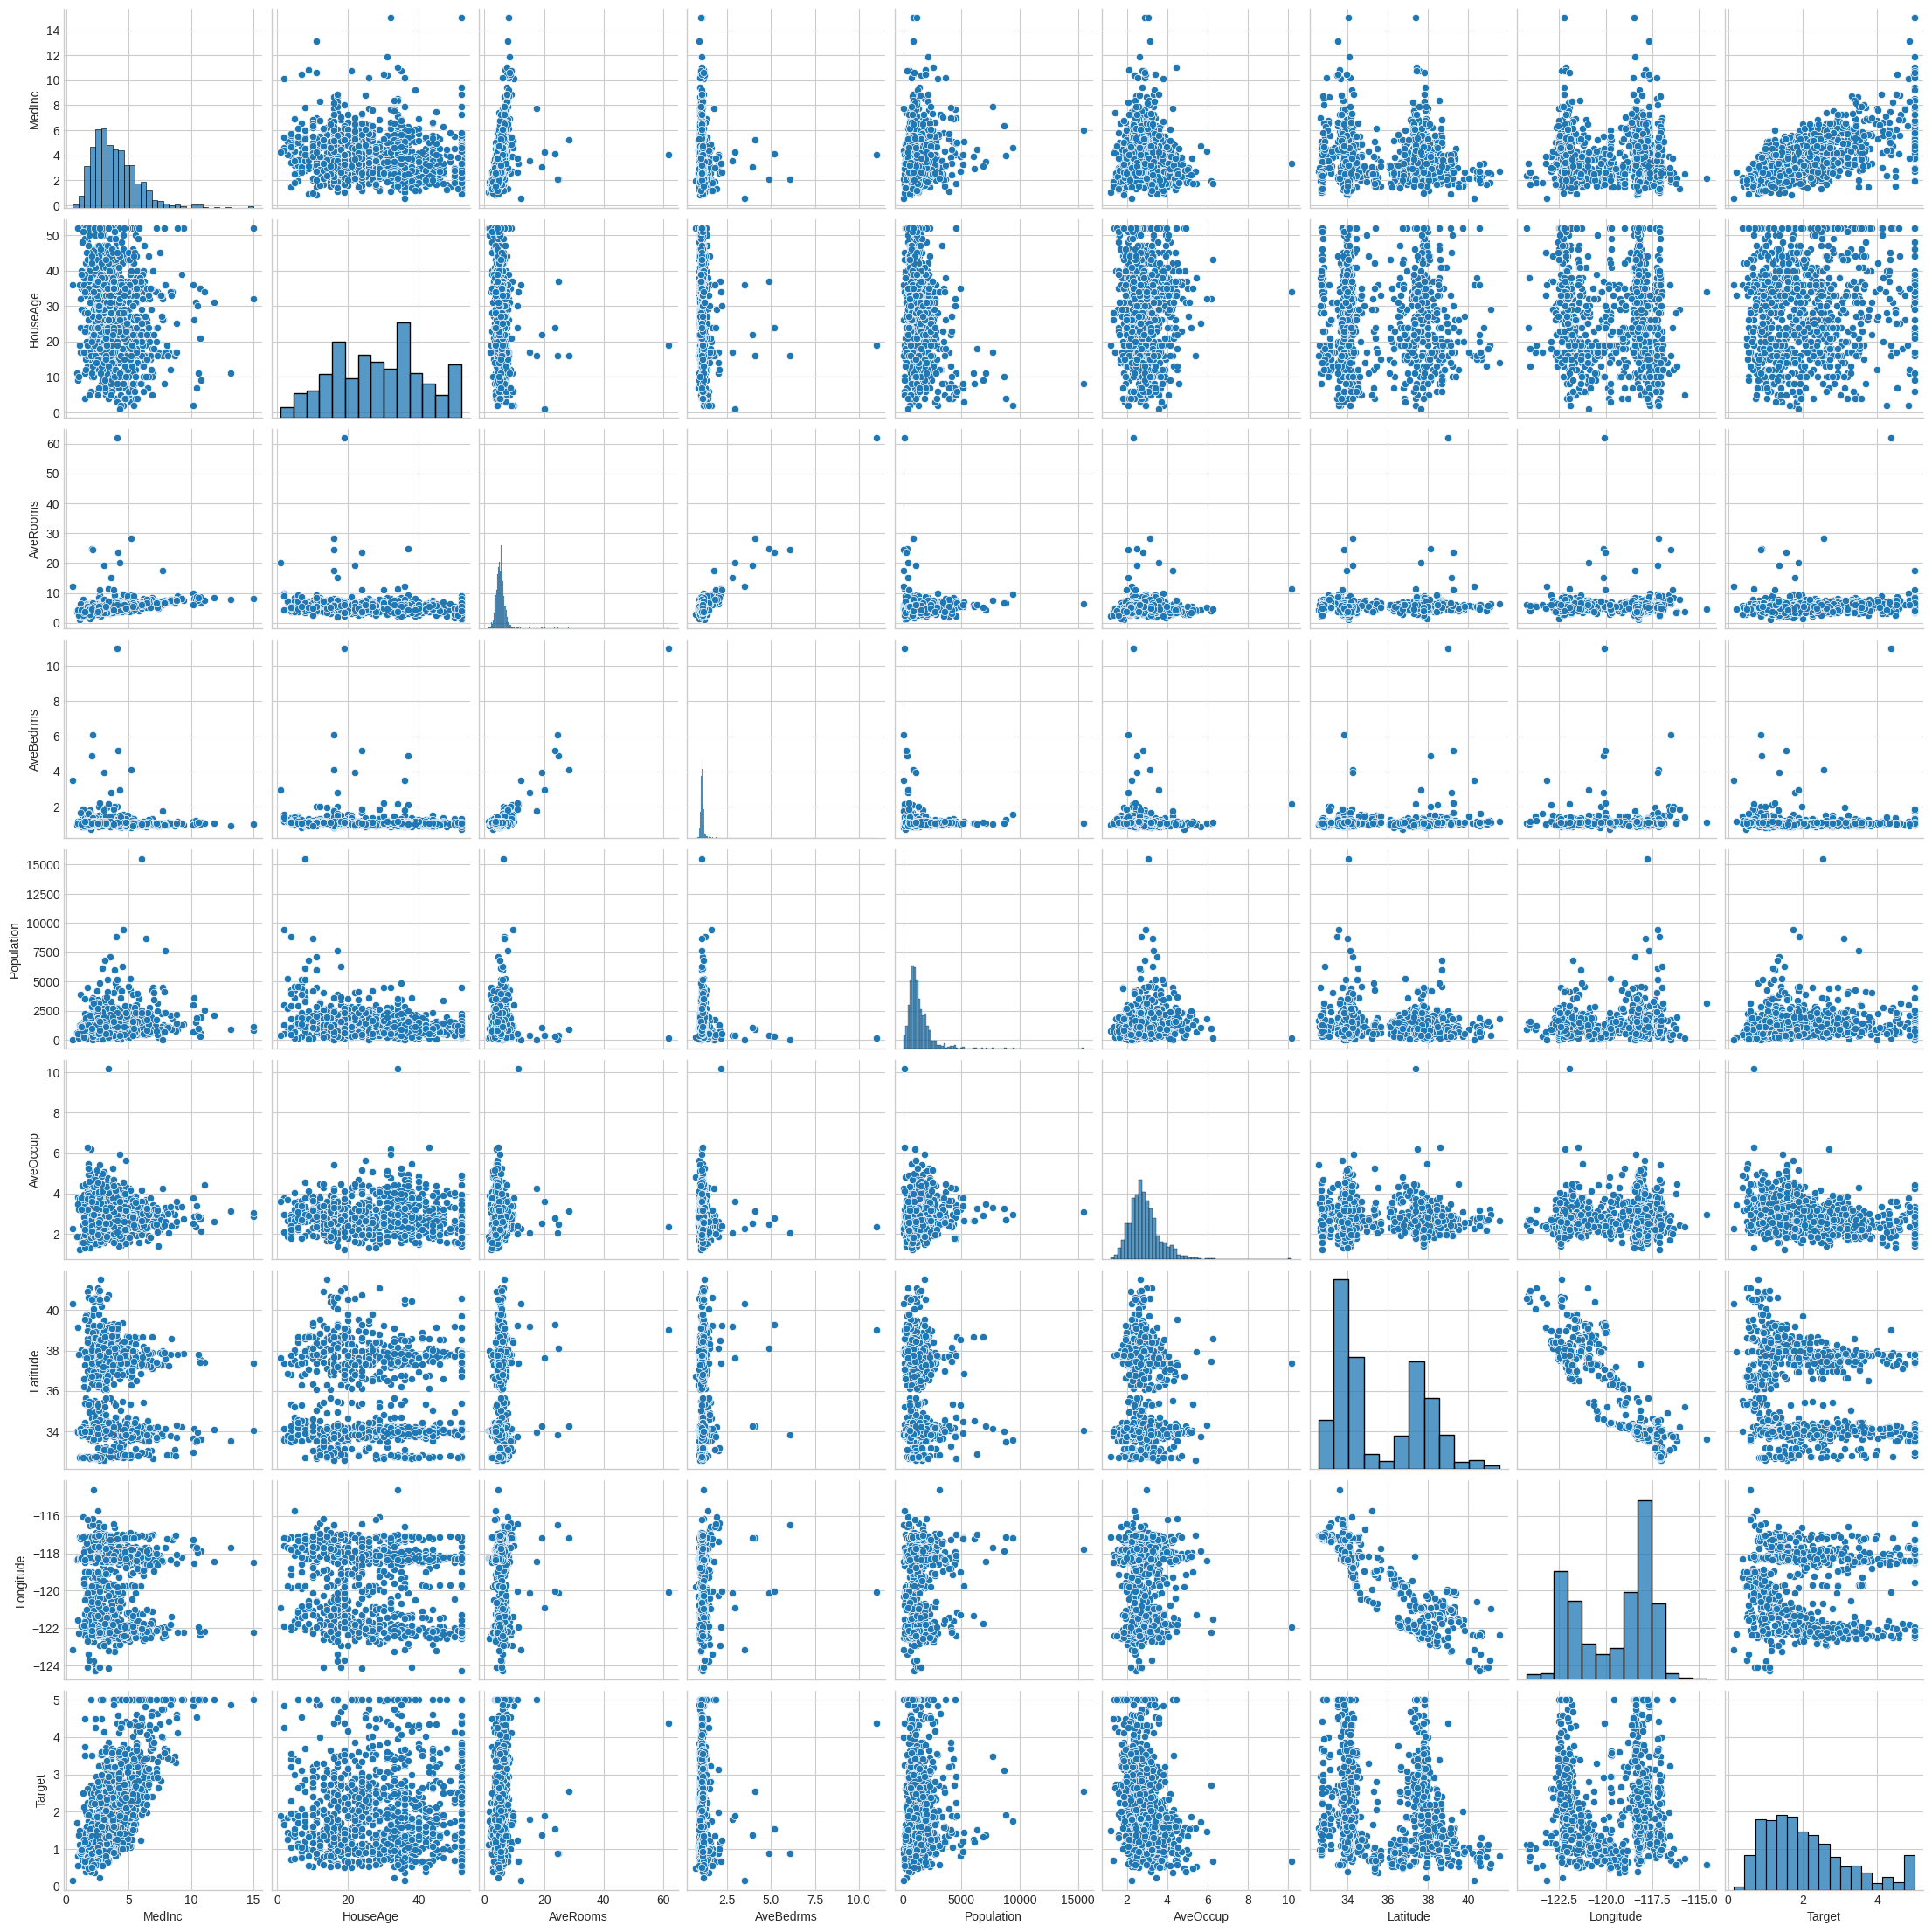

In [24]:
import seaborn as sns
sns.pairplot(california_df.sample(1000));

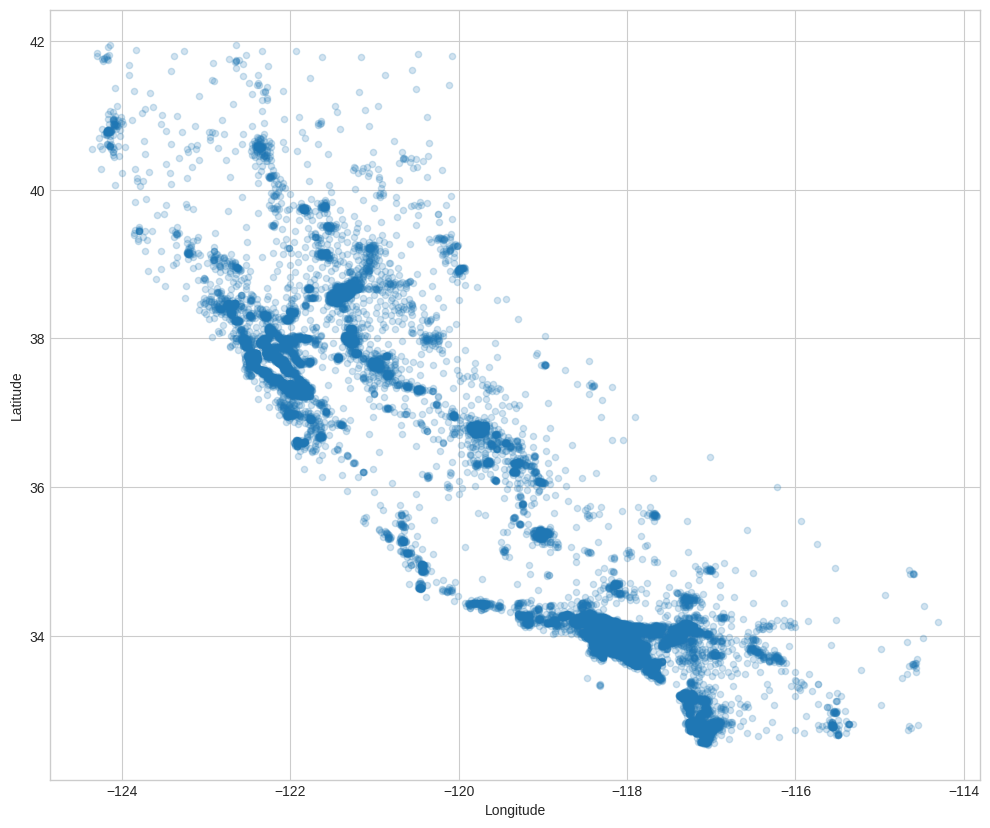

In [25]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12, 10));

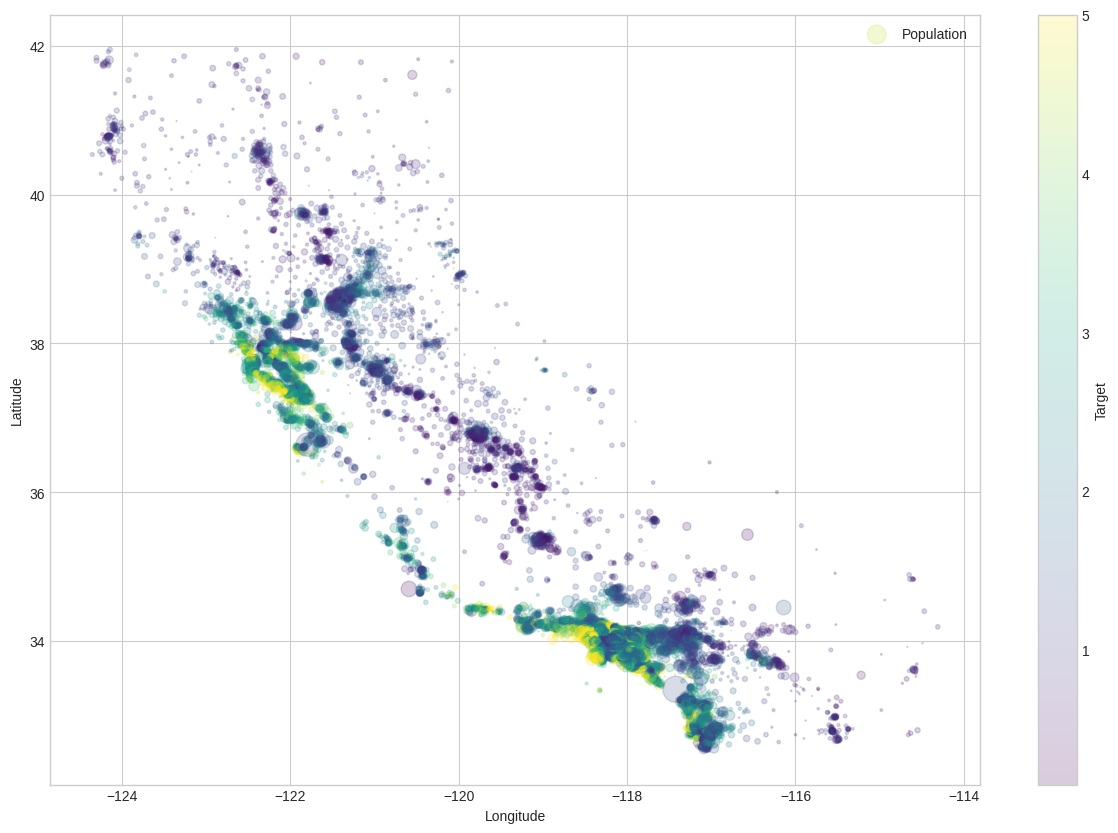

In [26]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2,
                   s=california_df['Population']/100, label='Population', figsize=(15, 10),
                   c='Target', cmap=plt.get_cmap('viridis'), colorbar=True);

### 캘리포니아 주택 가격에 대한 선형 회귀

In [27]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

model.fit(X_train, y_train)
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

scores = cross_val_score(model, california.data, california.target, cv=10, scoring='neg_mean_squared_error')
print('NMSE mean: {}'.format(scores.mean()))
print('NMSE std: {}'.format(scores.std()))

r2_scores = cross_val_score(model, california.data, california.target, cv=10, scoring='r2')
print('R2 Score mean: {}'.format(r2_scores.mean()))

학습 데이터 점수: 0.6085373496120187
평가 데이터 점수: 0.5961526505723544
NMSE mean: -0.550952429695663
NMSE std: 0.19288582953865002
R2 Score mean: 0.5110068610523775


In [28]:
print('y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
  print(str(c) + ' * x' + str(i))

y = -36.46218560112279 
0.4379344556767682 * x0
0.009570284734713438 * x1
-0.10144127571697657 * x2
0.6150561607721409 * x3
-3.6063868707730123e-06 * x4
-0.00474650327652729 * x5
-0.418502337186152 * x6
-0.4296090908378891 * x7


In [29]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE: 0.7212827940793453
R2 Score: 0.6085373496120187


In [30]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE: 0.7359533529783091
R2 Score: 0.5961526505723544


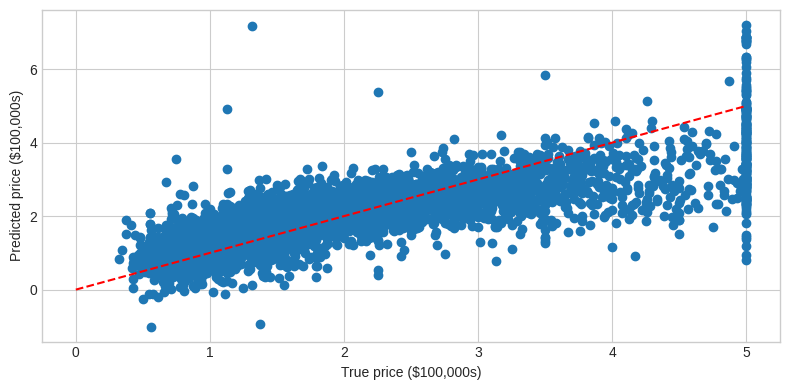

In [31]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize=(8, 4))
  plt.scatter(expected, predicted)
  plt.plot([0, 5], [0, 5], '--r')
  plt.xlabel('True price ($100,000s)')
  plt.ylabel('Predicted price ($100,000s)')
  plt.tight_layout()
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

## 릿지 회귀(Ridge Regression)

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

### 캘리포니아 주택 가격에 대한 릿지 회귀

In [49]:
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)


In [50]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [46]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6067913495631029
평가 데이터 점수: 0.6023796803222712


* 릿지 회귀는 가중치에 제약을 두기 때문에 선형 회귀 모델보다 훈련 데이터 점수가 낮을 수 있음
* 일반화 성능은 릿지 회귀가 더 높기 때문에 평가 데이터 점수는 릿지 회귀가 더 좋음

* 일반화 성능에 영향을 주는 매개 변수인 $\alpha$ 값을 조정해 보면서 릿지 회귀 분석의 성능이 어떻게 변하는지 확인 필요

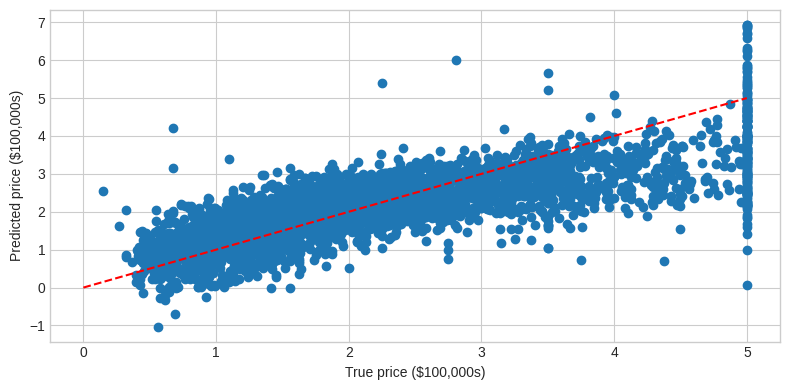

In [47]:
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

## 라쏘 회귀(Lasso Regression)

* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

### 캘리포니아 주택 가격에 대한 라쏘 회귀

In [54]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [55]:
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [56]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6020096466861866
평가 데이터 점수: 0.6215045273562823


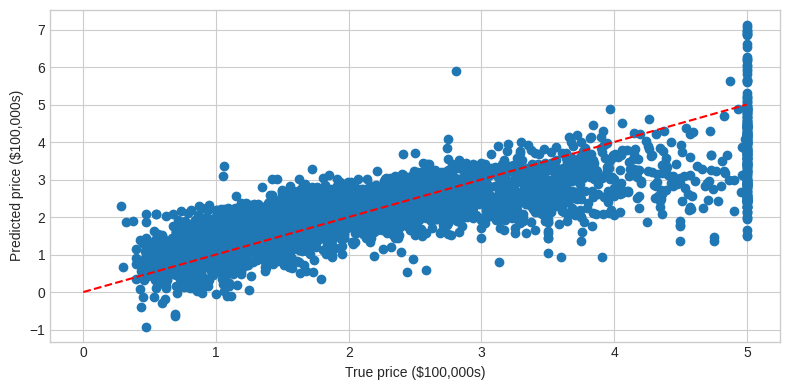

In [60]:
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

## 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

### 캘리포니아 주택 가격에 대한 신축망

In [65]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [63]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [64]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.60438933708296
평가 데이터 점수: 0.6042435555149106


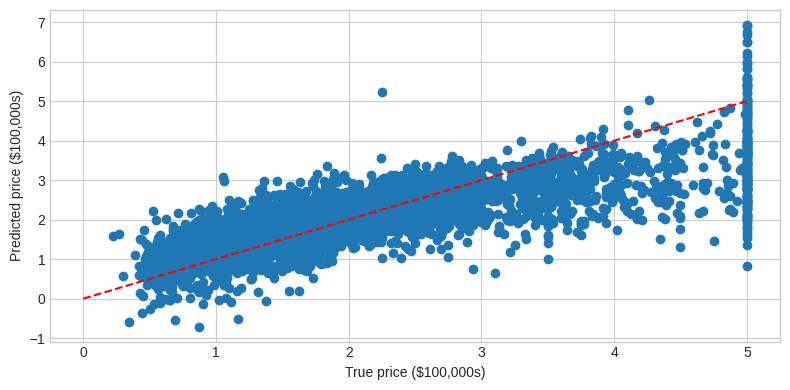

In [66]:
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

## 직교 정합 추구 (Orthogonal Matching Pursuit)

* 직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법

* 직교 정합 추구 방법은 다음을 만족하는 파라미터 $w$를 찾는것이 목표

\begin{equation}
\underset{w}{\arg \min} \; ||y - \hat{y}||^2_2 \; subject \; to \; ||w||_0 \leq k
\end{equation}

  + $||w||_0$: 가중치 벡터 $w$에서 0이 아닌 값의 개수

* 직교 정합 추구 방법은 가중치 벡터 $w$에서 0이 아닌 값이 $k$개 이하가 되도록 훈련됨
* 이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거 하도록 만들 수 있음

* 직교 정합 추구 방법은 위에서 설명한 제약 조건 대신에 다음 조건을 만족하도록 변경 가능

\begin{equation}
\underset{w}{\arg \min} \; ||w||_0 \; subject \; to \; ||y - \hat{y}||^2_2 \leq tol
\end{equation}

  + $||y - \hat{y}||^2_2$는 $\sum_{i=1}^N (y - \hat{y})^2$와 같은 의미

* 위의 식을 통해서 직교 정합 추구 방법을 $y$와 $\hat{y}$ 사이의 오차 제곱 합을 $tol$ 이하로 하면서 $||w||_0$를 최소로 하는 모델로 대체 가능

### 캘리포니아 주택 가격에 대한 직교 정합 추구

In [68]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [70]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=5)
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(n_nonzero_coefs=5)

In [71]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))


학습 데이터 점수: 0.5177342965749793
평가 데이터 점수: 0.4976831212934478


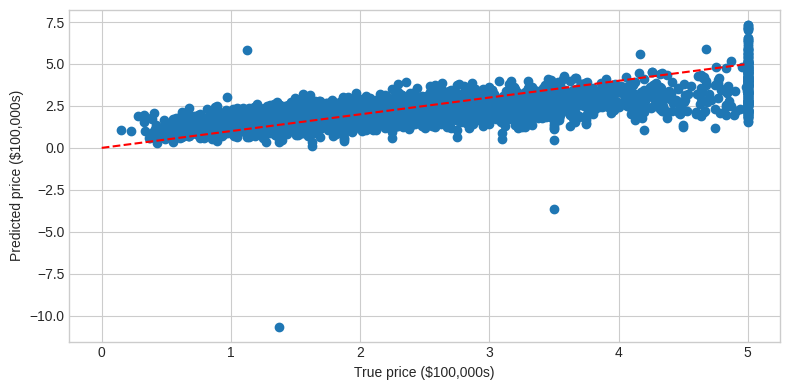

In [72]:
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

In [73]:
model = OrthogonalMatchingPursuit(tol=1.)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_omp.py:771: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  coef_, self.n_iter_ = orthogonal_mp_gram(


OrthogonalMatchingPursuit(tol=1.0)

In [74]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))


학습 데이터 점수: 0.605286753759862
평가 데이터 점수: 0.5972728386822587


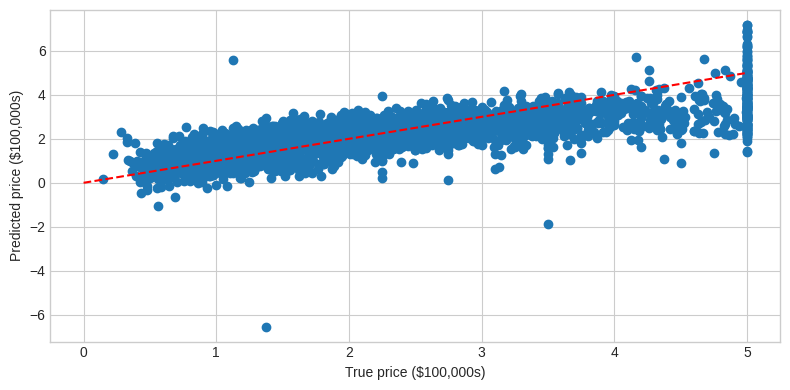

In [75]:
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

## 다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

* 차수가 높아질수록 더 복잡한 데이터 학습 가능

![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)


### 캘리포니아 주택 가격에 대한 다항 회귀

In [76]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [77]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [78]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))


학습 데이터 점수: 0.6883418306232013
평가 데이터 점수: 0.5972310706571944


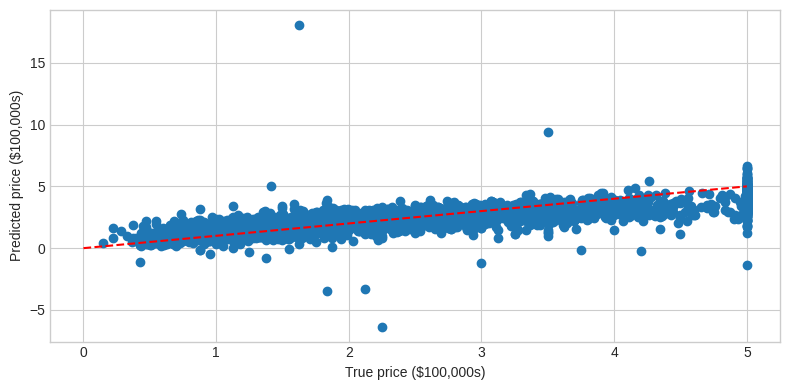

In [79]:
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

## 참고문헌

* scikit-learn 사이트: https://scikit-learn.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Sebastian Raschka, Vahid Mirjalili, "Python Machine Learning", Packt
* Giuseppe Bonaccorso, "Machine Learning Algorithm", Packt
* Aurelien Geron, "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems", O'Reilly